In [3]:
import yaml

# 環境の確認
with open('../enviroment.yaml', 'r') as yml:
    enviroment = yaml.safe_load(yml)['enviroment']
print('enviroment:', enviroment)

# 設定ファイルの読み込み
with open('config.yaml', 'r') as yml:
    config = yaml.safe_load(yml)[enviroment]

enviroment: development


In [4]:
config

{'data_directory_path': 'E:\\FaceRecognitionData',
 'movie_path': 'E:\\FaceRecognitionData\\movie',
 'movie_manage_path': 'E:\\FaceRecognitionData\\MovieManage.db',
 'face_db_path': 'E:\\FaceRecognitionData\\split_db',
 'face_recognition_frame_rate': 10,
 'bulk_insert_size': 5000,
 'frame_scope': 10,
 'similarity_threshold': 0.5}

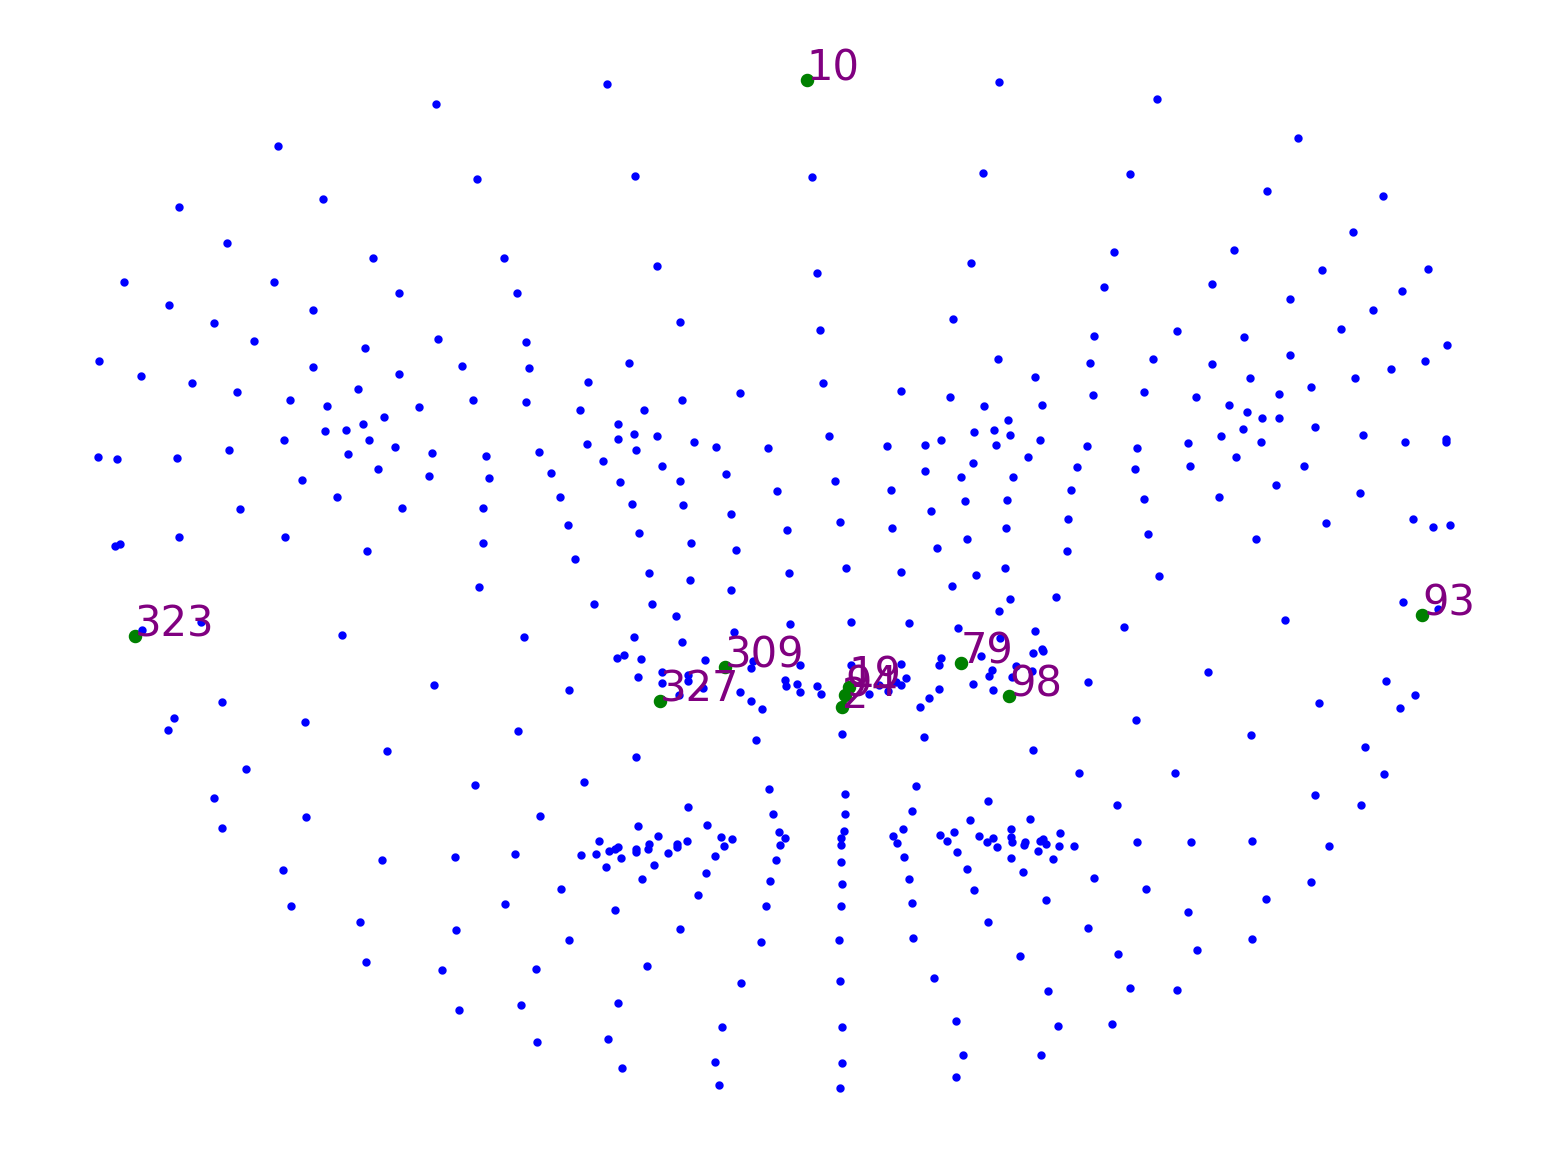

In [16]:
from skelton_estimation_module import sql_func as skelton_sql_func
from common_module import my_func, movie_func
import itertools
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from skelton_estimation_module import pose_estimation
import cv2
import glob, os, sys
import csv
import matplotlib.cm as cm 

# ====pairデータチェック====
# face heatmapの画像生成用のface meshとhandsのランドマーク設定
pose = pose_estimation.PoseEstimation()
img = cv2.imread(f"{config['data_directory_path']}/basic_data/front_face.jpg")
pose.set_image(img)
# pose.set_image(cv2.rotate(img, cv2.ROTATE_180))

# 正面画像のface meshを1次元化
flat_face = list(itertools.chain.from_iterable([row[0:3] for row in pose.get_landmarks('face')]))
# 正面画像のhandsを1次元化
flat_hands = {'right_hand':list(itertools.chain.from_iterable([row[0:3] for row in pose.get_landmarks('right_hand')])), 'left_hand':list(itertools.chain.from_iterable([row[0:3] for row in pose.get_landmarks('left_hand')]))}


# pairデータチェック
with open(f"{config['data_directory_path']}/basic_data/face_landmarks_pair.csv") as f:
    reader = csv.reader(f)
    idx_list = list(itertools.chain.from_iterable([[int(r) for r in row] for row in reader if not '' in row]))
    idx_list.sort()

arr = flat_face

x = [arr[i] for i in np.arange(0, len(arr), 3)]
y = [arr[i] for i in np.arange(1, len(arr), 3)]
z = [arr[i] for i in np.arange(2, len(arr), 3)]

fig = plt.figure(dpi=300)
ax = fig.add_subplot()
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

# check_list = [i for i in range(241,241+10)]
check_list = [93,323,10,19,79,309,98,327,2,94]
for i,_ in enumerate(x):
    c = 'blue' if i in idx_list else 'red'
    if i in check_list:
        c = 'green'
        ax.scatter(x[i], y[i], s=5,color=c)
    ax.scatter(x[i], y[i], s=1,color=c)
    if i in check_list:
        ax.text(x[i],y[i],i,fontsize=10, color='purple')

ax.axis('off')
plt.show()

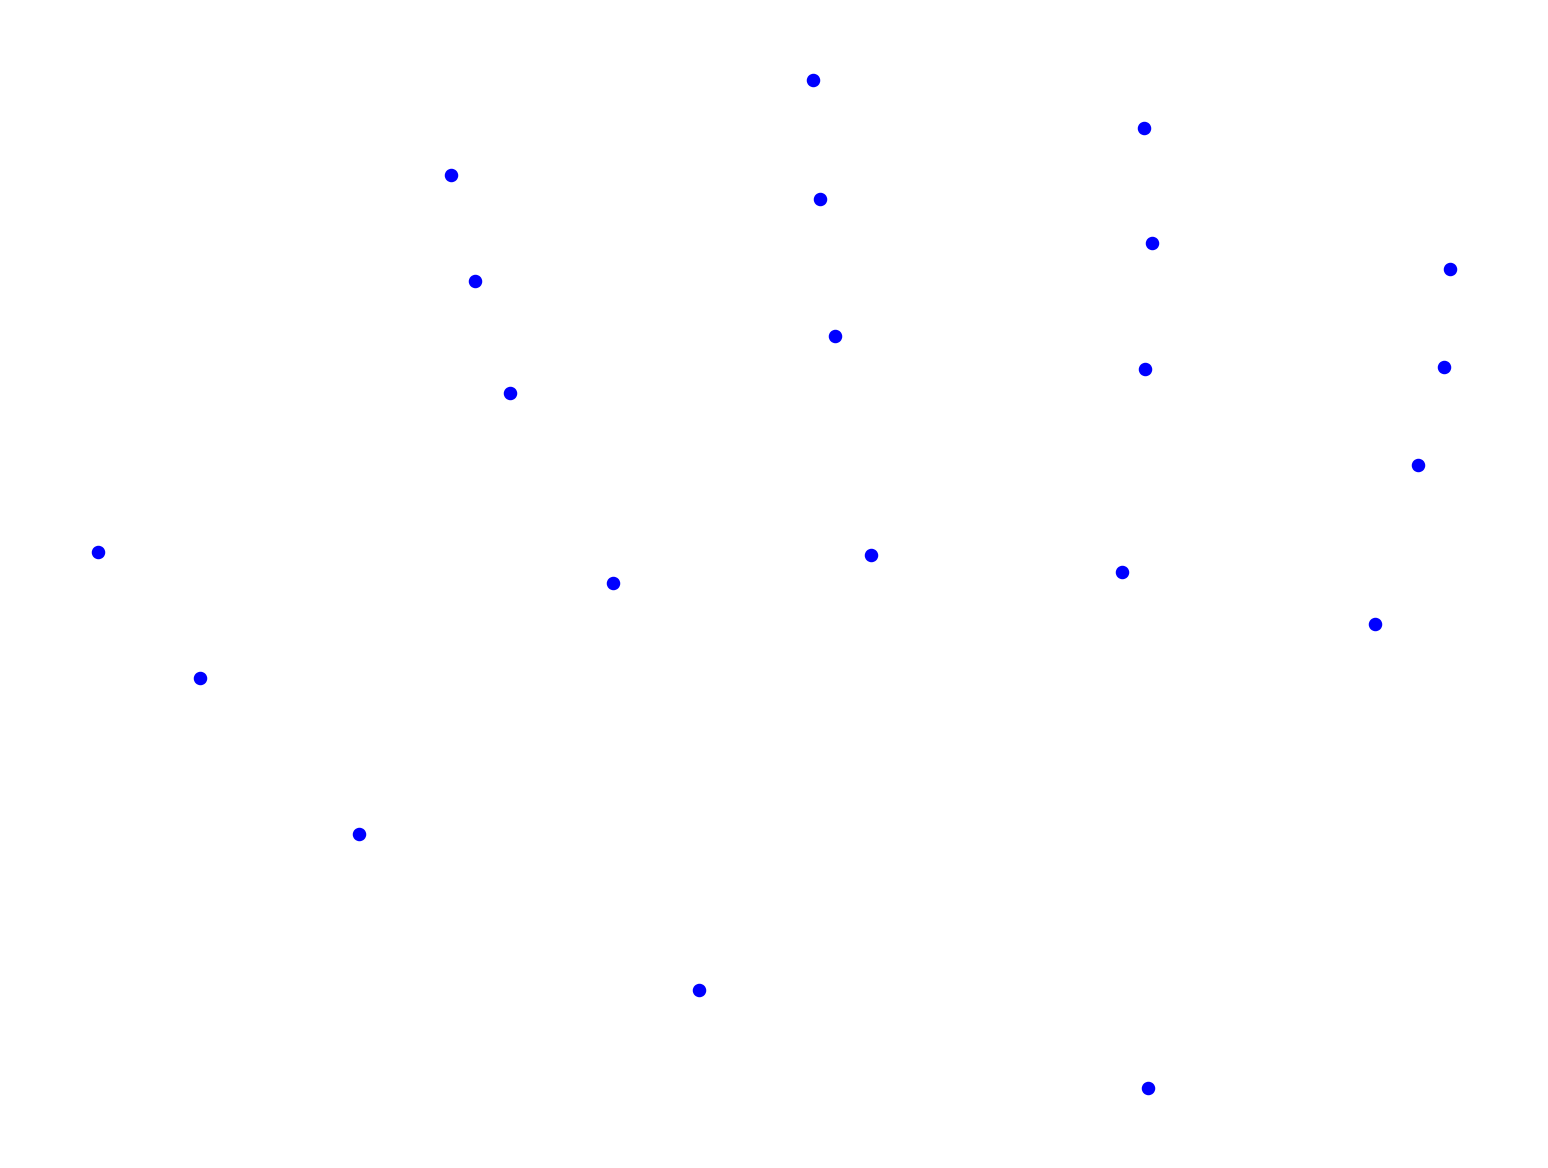

In [6]:
arr = flat_hands['right_hand']

x = [arr[i] for i in np.arange(0, len(arr), 3)]
y = [arr[i] for i in np.arange(1, len(arr), 3)]
z = [arr[i] for i in np.arange(2, len(arr), 3)]

fig = plt.figure(dpi=300)
ax = fig.add_subplot()
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
for i,_ in enumerate(x):
    c = 'blue'# if i in idx_list else 'red'
    # if i in check_list:
    #     c = 'green'
    #     ax.scatter(x[i], y[i], s=5,color=c)
    ax.scatter(x[i], y[i], s=5,color=c)
    # if i in check_list:
    #     ax.text(x[i],y[i],i,fontsize=10, color='purple')

ax.axis('off')
plt.show()

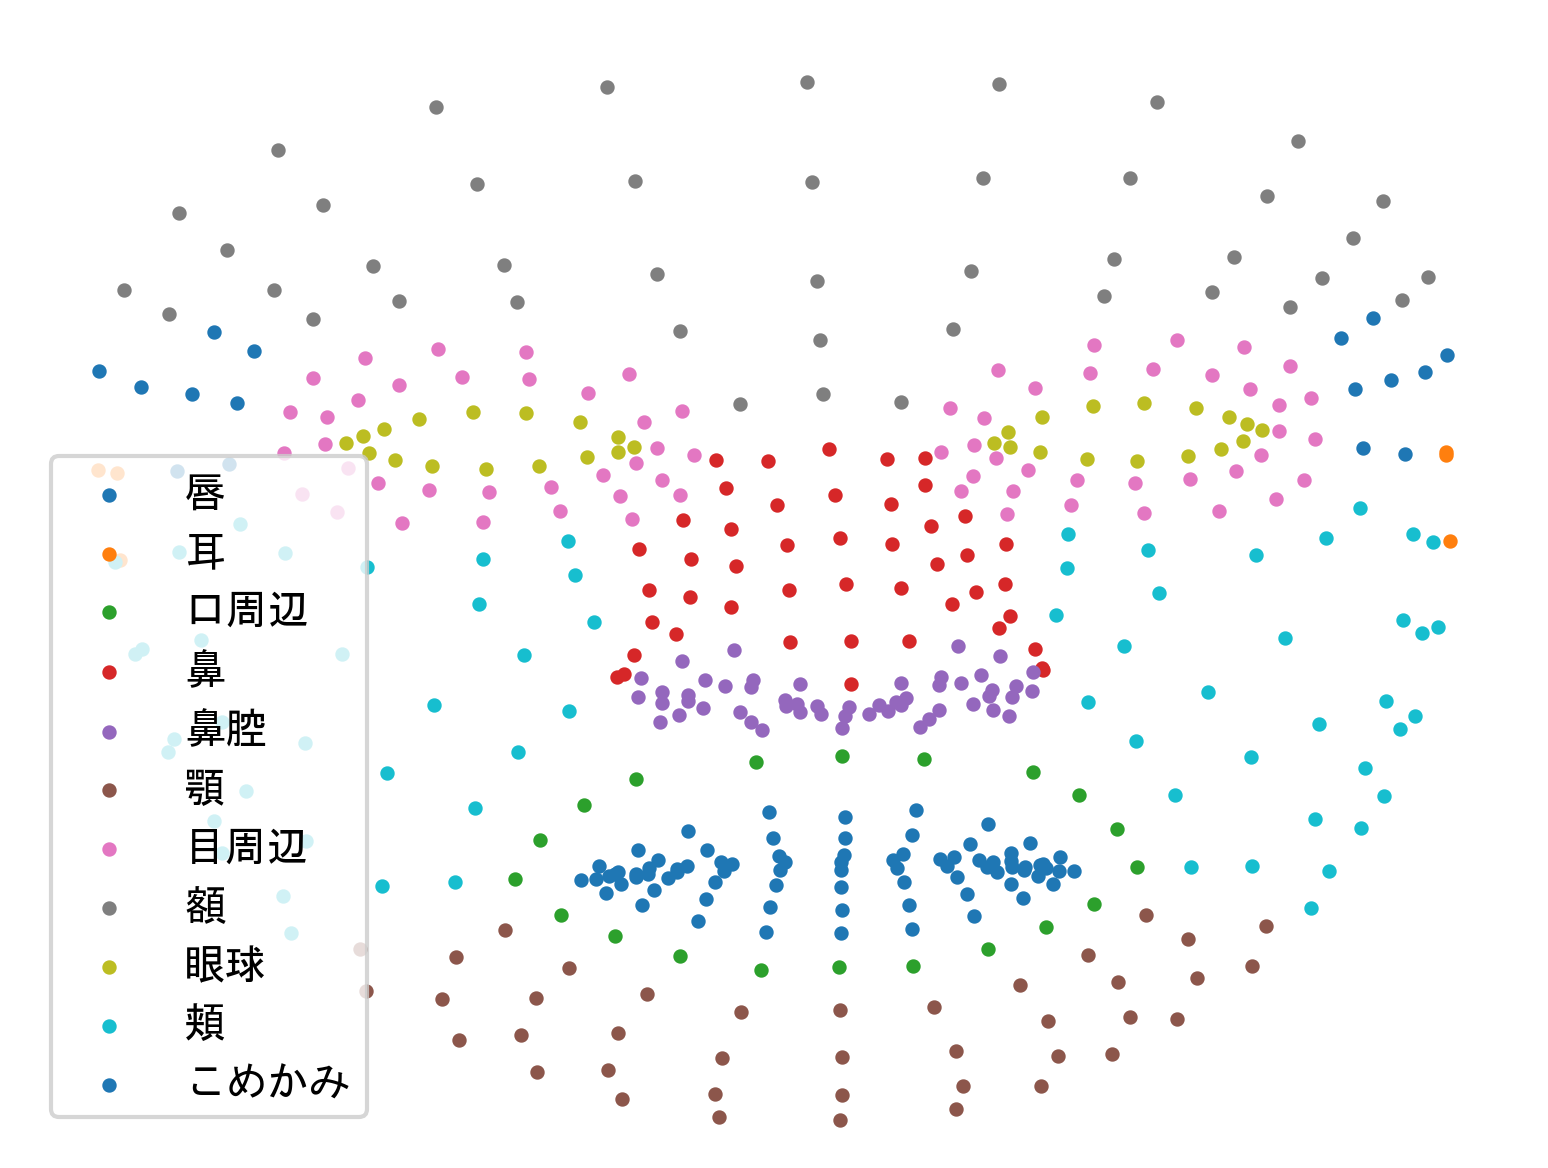

In [19]:
from skelton_estimation_module import sql_func as skelton_sql_func
from common_module import my_func, movie_func
import itertools
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from skelton_estimation_module import pose_estimation
import cv2
import glob, os, sys
import csv
import matplotlib.cm as cm 
import matplotlib.colors as mcolors



# pairデータチェック
with open(f"{config['data_directory_path']}/basic_data/face_landmarks_pair_detail.csv") as f:
    reader = csv.reader(f)
    idx_list = [[r for r in row] for row in reader if not '' in row]
    face_parts = {}
    for r in idx_list:
        face_parts[int(r[0])] = r[2]
        face_parts[int(r[1])] = r[2]

part_color = {}
for part, color in zip(set(face_parts.values()),list(mcolors.TABLEAU_COLORS.items())[0:len(list(set(face_parts.values())))]):
    part_color[part] = color[1]
part_color

# ====pairデータチェック====
# face heatmapの画像生成用のface meshとhandsのランドマーク設定
pose = pose_estimation.PoseEstimation()
img = cv2.imread(f"{config['data_directory_path']}/basic_data/front_face.jpg")
h,w,_ = img.shape
pose.set_image(img)
# pose.set_image(cv2.rotate(img, cv2.ROTATE_180))

# 正面画像のface meshを1次元化
flat_face = list(itertools.chain.from_iterable([row[0:3] for row in pose.get_landmarks('face')]))
# 正面画像のhandsを1次元化
flat_hands = {'right_hand':list(itertools.chain.from_iterable([row[0:3] for row in pose.get_landmarks('right_hand')])), 'left_hand':list(itertools.chain.from_iterable([row[0:3] for row in pose.get_landmarks('left_hand')]))}


# pairデータチェック
with open(f"{config['data_directory_path']}/basic_data/face_landmarks_pair.csv") as f:
    reader = csv.reader(f)
    idx_list = list(itertools.chain.from_iterable([[int(r) for r in row] for row in reader if not '' in row]))
    idx_list.sort()

arr = flat_face

x = [arr[i] for i in np.arange(0, len(arr), 3)]
y = [arr[i] for i in np.arange(1, len(arr), 3)]
z = [arr[i] for i in np.arange(2, len(arr), 3)]

fig = plt.figure(dpi=300)
ax = fig.add_subplot()
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

parts_name = {'eair':'耳', 'temple':'こめかみ', 'eye':'目周辺', 'cheek':'頬', 'forehead':'額', 'chin':'顎', 'mouse':'口周辺', 'nose':'鼻', 'eye1':'眼球', 'nasal_cavity':'鼻腔','lips':'唇'}
part_idxs = {}
for part in set(face_parts.values()):
    part_idxs[part] = []
    for item in face_parts.items():
        if item[1] == part:
            part_idxs[part].append(item[0])
# print(part_idxs)

for part_idx in part_idxs.items():
    coord = np.array([[x[i]*w,y[i]*h] for i in part_idx[1]]).T
    ax.scatter(coord[0], coord[1], s=6, label=parts_name[part_idx[0]])
    # for coord_x,coord_y,l in zip(coord[0], coord[1],part_idx[1]):
        # ax.text(coord_x,coord_y,str(l),fontsize=5, color='purple')

# check_list = [i for i in range(241,241+10)]
# for i,_ in enumerate(x):
#     c = 'blue' if i in idx_list else 'red'
    
#     ax.scatter(x[i]*w, y[i]*h, s=3,color=part_color[face_parts[i]])
#     ax.text(x[i]*w,y[i]*h,i,fontsize=3, color='purple')
ax.invert_yaxis()
# ax.set_ylim(900,2750)
ax.set_ylim(900,2250)
# ax.set_xlim(1250,3000)
ax.legend(fontsize = 5, prop={"family":"MS Gothic"})
ax.axis('off')
# plt.imshow(img)
plt.show()

In [14]:
part_idxs.keys()

dict_keys(['eair', 'temple', 'eye', 'cheek', 'forehead', 'chin', 'mouse', 'nose', 'eye1'])

In [ ]:
parts_name = {'eair':'耳', 'temple':'こめかみ', 'eye':'目周辺', 'cheek':'頬', 'forehead':'額', 'chin':'顎', 'mouse':'口', 'nose':'鼻', 'eye1':'眼球'}